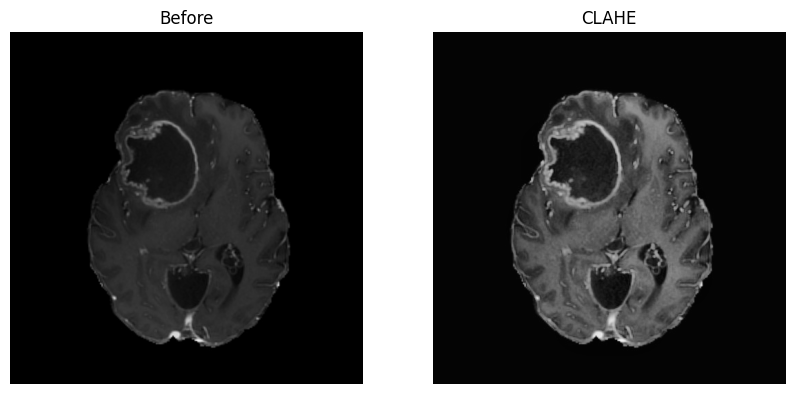

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기 (이미지를 RGB로 읽음)
img = cv2.imread('./00095_188.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV의 기본 BGR을 RGB로 변환

# RGB에서 YUV 색 공간으로 변환
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

# CLAHE 객체 생성 및 적용
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) #클립 한계를 3.0, 타일 그리드 크기를 (8,8)로 설정
img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])  # Y 채널에 CLAHE 적용

# 다시 RGB 색 공간으로 변환
img_clahe_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

# CLAHE 적용 이미지를 파일로 저장
cv2.imwrite('/mnt/data/image_clahe.png', cv2.cvtColor(img_clahe_rgb, cv2.COLOR_RGB2BGR))

# 이미지 디스플레이 (matplotlib 사용)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Before')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CLAHE')
plt.imshow(img_clahe_rgb)
plt.axis('off')

plt.show()


Saved processed image to: ./coronal_train_CLAHE/89 (5).jpg
Saved processed image to: ./coronal_train_CLAHE/67 (5).jpg
Saved processed image to: ./coronal_train_CLAHE/104.jpg
Saved processed image to: ./coronal_train_CLAHE/64 (8).jpg
Saved processed image to: ./coronal_train_CLAHE/63 (2).jpg
Saved processed image to: ./coronal_train_CLAHE/93 (6).jpg
Saved processed image to: ./coronal_train_CLAHE/71.jpg
Saved processed image to: ./coronal_train_CLAHE/81 (4).jpg
Saved processed image to: ./coronal_train_CLAHE/89.jpg
Saved processed image to: ./coronal_train_CLAHE/62 (4).jpg
Saved processed image to: ./coronal_train_CLAHE/79 (6).jpg
Saved processed image to: ./coronal_train_CLAHE/108.jpg
Saved processed image to: ./coronal_train_CLAHE/92 (6).jpg
Saved processed image to: ./coronal_train_CLAHE/80.jpg
Saved processed image to: ./coronal_train_CLAHE/71 (3).jpg
Saved processed image to: ./coronal_train_CLAHE/72 (4).jpg
Saved processed image to: ./coronal_train_CLAHE/78 (4).jpg
Saved processed

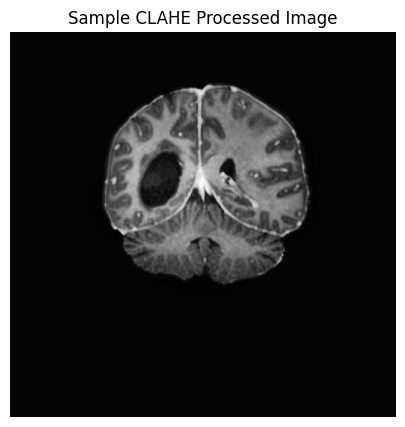

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def apply_clahe_to_image(image_path, output_path, clip_limit=3.5, tile_grid_size=(8, 8)):
    # 이미지 읽기 (이미지를 RGB로 읽음)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: 이미지 파일을 읽을 수 없습니다: {image_path}")
        return False

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV의 기본 BGR을 RGB로 변환

    # RGB에서 YUV 색 공간으로 변환
    img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

    # CLAHE 객체 생성 및 적용
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])  # Y 채널에 CLAHE 적용

    # 다시 RGB 색 공간으로 변환
    img_clahe_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

    # CLAHE 적용 이미지를 파일로 저장
    success = cv2.imwrite(output_path, cv2.cvtColor(img_clahe_rgb, cv2.COLOR_RGB2BGR))
    if success:
        print(f"Saved processed image to: {output_path}")
    else:
        print(f"Error: Failed to save image to: {output_path}")
    return success

# 폴더 경로 설정
input_images_folder = './train'  # 입력 이미지 폴더 경로 (해당 ipynb가 존재하는 폴더 내의 다른 폴더)
output_images_folder = './coronal_train_CLAHE'  # 출력 이미지 폴더 경로

# 출력 폴더가 존재하지 않으면 생성
os.makedirs(output_images_folder, exist_ok=True)

# 이미지 파일에 CLAHE 적용
processed_images = []
for root, dirs, files in os.walk(input_images_folder):
    for filename in files:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            input_image_path = os.path.join(root, filename)
            relative_path = os.path.relpath(input_image_path, input_images_folder)
            output_image_path = os.path.join(output_images_folder, relative_path)
            
            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
            
            # CLAHE 적용
            if apply_clahe_to_image(input_image_path, output_image_path):
                processed_images.append(output_image_path)

# 결과 이미지 디스플레이 (예시로 첫 번째 이미지를 표시)
if processed_images:
    sample_image = processed_images[0]
    img_sample = cv2.imread(sample_image)
    img_sample_rgb = cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.imshow(img_sample_rgb)
    plt.axis('off')
    plt.title('Sample CLAHE Processed Image')
    plt.show()
else:
    print("Error: No processed images found in the output folder.")
